In [1]:
import os

# Change the current directory to root directory
new_directory = "../"
os.chdir(new_directory)

# Verify the current directory has changed
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Updated Directory: /media/toma/2TB_30May2023/OBJECT_DETECTION_L/object_detection


In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor
from utils.augmentations import generate_transform_function_panoptic

/media/toma/2TB_30May2023/OBJECT_DETECTION_L/object_detection/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/media/toma/2TB_30May2023/OBJECT_DETECTION_L/object_detection/.venv/lib/python3.9/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSF

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


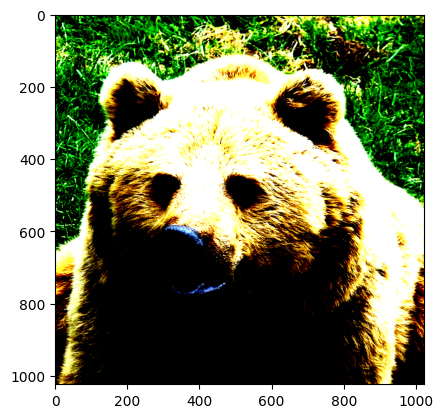

In [3]:
## COCO AUGMENTATION TEST
# read image
IMG_URL = "http://images.cocodataset.org/val2017/000000000285.jpg"

response = requests.get(IMG_URL)
image = Image.open(BytesIO(response.content))

# load image processor and augmentation config
image_processor = AutoImageProcessor.from_pretrained("configs/architectures/custom_mask2former/preprocessor_config.json")
augmentation_config_path = "configs/augmentation/augmentation_config_coco_panoptic.json"


transforms_fn = generate_transform_function_panoptic(image_processor, augmentation_config_path, is_validation = False, is_mask = False)

# transform, and show image
img_aug = transforms_fn(image)

print(img_aug.shape)
plt.imshow(img_aug.permute(1, 2, 0))


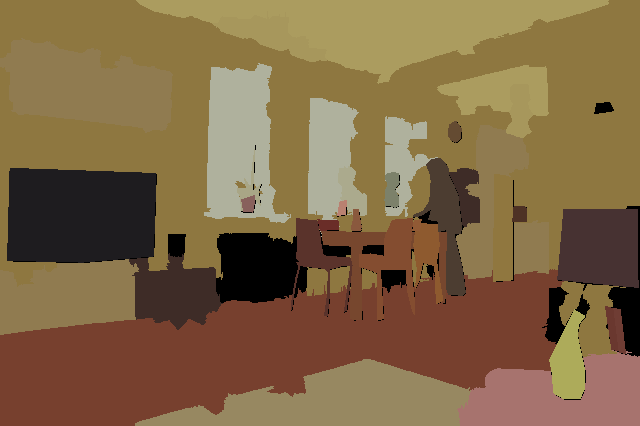

In [18]:
IMG_PATH = "data/coco_datasets/panoptic_val2017/000000000139.png"
image = Image.open(IMG_PATH)
image

##### Read mask image in PIL format, then numpy, then torch, and print unique values

In [19]:
IMG_PATH = "data/coco_datasets/panoptic_val2017/000000000139.png"
image = Image.open(IMG_PATH)

import cv2
import numpy as np
import torch

IMG_URL = "data/coco_datasets/panoptic_val2017/000000000139.png"

# Read the image using OpenCV
image = Image.open(IMG_URL)


def pil_to_tensor(PIL_image):

    # Convert PIL image to NumPy array
    image_array = np.array(PIL_image) # to extract mask values

    image_array = np.transpose(image_array, (2, 0, 1))  # (H, W, C) to (C, H, W)

    # Convert NumPy array to PyTorch tensor
    tensor_image = torch.as_tensor(image_array, dtype=torch.int32)
    # tensor_image = tensor_image.permute((2, 0, 1))

    return tensor_image


image = pil_to_tensor(image)
unique_values = torch.unique(image)
print(unique_values)

tensor([  0,  28,  30,  31,  37,  39,  40,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  56,  61,  62,  63,  64,  71,  75,  76,  77,  78,
         80,  89,  90,  92,  95,  97, 100, 106, 110, 111, 113, 115, 119, 123,
        124, 129, 132, 134, 136, 138, 141, 142, 144, 145, 151, 156, 157, 166,
        167, 169, 170, 171, 173, 175, 177, 185], dtype=torch.int32)


##### Read mask image in numpy format, then print unique values

In [17]:
## COCO AUGMENTATION TEST
# read image
import cv2
import numpy as np

IMG_URL = "data/coco_datasets/panoptic_val2017/000000001353.png"

# Read the image using OpenCV
image = cv2.imread(IMG_URL)
image_np = np.array(image)

print(np.unique(image_np))
print(type(image_np))

[  0  12  13  14  15  20  22  23  26  28  33  38  42  43  45  46  47  50
  59  62  66  78  81  82  98 147]
<class 'numpy.ndarray'>


[  0  12  13  14  15  20  22  23  26  28  33  38  42  43  45  46  47  50
  59  62  66  78  81  82  98 147]
<class 'numpy.ndarray'>


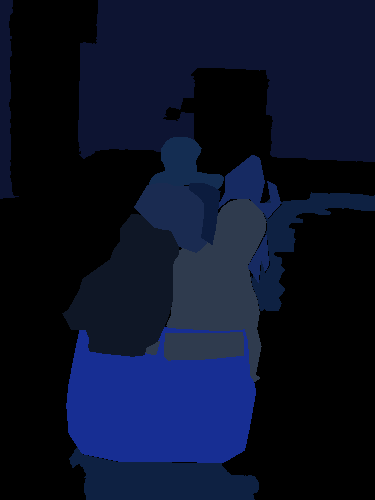

In [4]:
## COCO AUGMENTATION TEST
# read image
import cv2
import numpy as np

IMG_URL = "data/coco_datasets/panoptic_val2017/000000001353.png"

# Read the image using OpenCV
image = cv2.imread(IMG_URL)
image_np = np.array(image)

print(np.unique(image_np))
print(type(image_np))

from torchvision import transforms

image_pil = transforms.ToPILImage()(image_np)

# Confirm the image range
image_pil

In [5]:
import numpy as np
from PIL import Image

image_path = "data/coco_datasets/panoptic_val2017/000000001353.png"

# Open the image using PIL
pil_image = Image.open(image_path)

# Convert PIL image to NumPy array
image_array = np.array(pil_image)

# Ensure the data type is int
image_array = image_array.astype(int)

# Check the range of values
min_value = np.min(image_array)
max_value = np.max(image_array)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 0
Maximum value: 147


torch.Size([3, 1024, 1024])


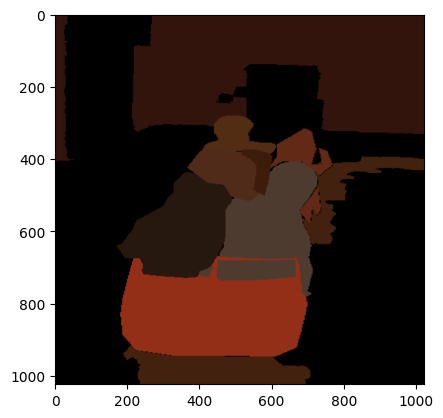

In [6]:
## COCO AUGMENTATION TEST
# read image
import cv2
import numpy as np

IMG_URL = "data/coco_datasets/panoptic_val2017/000000001353.png"

# Read the image using OpenCV
image = Image.open(IMG_URL)


# load image processor and augmentation config
image_processor = AutoImageProcessor.from_pretrained("configs/architectures/custom_mask2former/preprocessor_config.json")
augmentation_config_path = "configs/augmentation/augmentation_config_coco_panoptic.json"


transforms_fn = generate_transform_function_panoptic(image_processor, augmentation_config_path, is_validation = False, is_mask = True)

# transform, and show image
img_aug = transforms_fn(image)

print(img_aug.shape)
plt.imshow(img_aug.permute(1, 2, 0))

In [7]:
import torch

unique_values = torch.unique(img_aug)
print(unique_values)


tensor([  0,  12,  13,  14,  15,  20,  22,  23,  26,  28,  33,  38,  42,  43,
         45,  46,  47,  50,  59,  62,  66,  78,  81,  82,  98, 147],
       dtype=torch.int32)


In [8]:
import cv2
import numpy as np

IMG_URL = "data/coco_datasets/panoptic_val2017/000000001353.png"

# Read the image using OpenCV
image = Image.open(IMG_URL)


def pil_to_tensor(PIL_image):

    # Convert PIL image to NumPy array
    image_array = np.array(PIL_image) # to extract mask values

    image_array = np.transpose(image_array, (2, 0, 1))  # (H, W, C) to (C, H, W)

    # Check the range of values
    min_value = np.min(image_array)
    max_value = np.max(image_array)

    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")

    # Convert NumPy array to PyTorch tensor
    tensor_image = torch.as_tensor(image_array, dtype=torch.int32)
    # tensor_image = tensor_image.permute((2, 0, 1))

    return tensor_image



image = pil_to_tensor(image)

image

Minimum value: 0
Maximum value: 147


tensor([[[50, 50, 50,  ..., 50, 50, 50],
         [50, 50, 50,  ..., 50, 50, 50],
         [50, 50, 50,  ..., 50, 50, 50],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[20, 20, 20,  ..., 20, 20, 20],
         [20, 20, 20,  ..., 20, 20, 20],
         [20, 20, 20,  ..., 20, 20, 20],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[13, 13, 13,  ..., 13, 13, 13],
         [13, 13, 13,  ..., 13, 13, 13],
         [13, 13, 13,  ..., 13, 13, 13],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]]], dtype=torch.int32)